# Time Series Exercises: Data Preparation

In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from acquire import get_german_power, get_store_data
from prepare import get_power_distribution, prep_german_power, store_data_distribution, prep_store_data

## SuperStore

In [2]:
df = get_store_data()

In [3]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


### 1. Convert date column to datetime format.


In [4]:
# convert sale_date column to datetime
df.sale_date = pd.to_datetime(df.sale_date)

### 2. Plot the distribution of sale_amount and item_price.


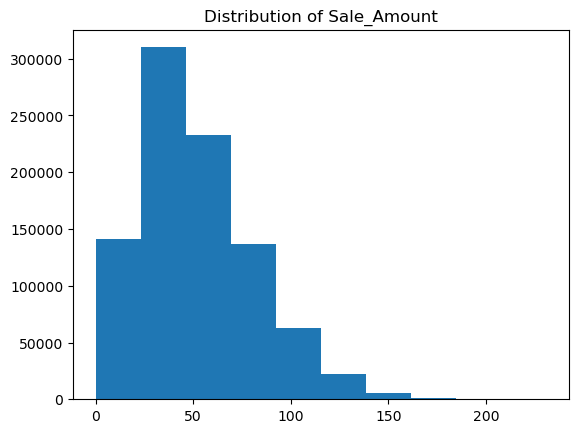

In [5]:
#visualize our distribution
plt.hist(df.sale_amount)
plt.title('Distribution of Sale_Amount')
plt.show()

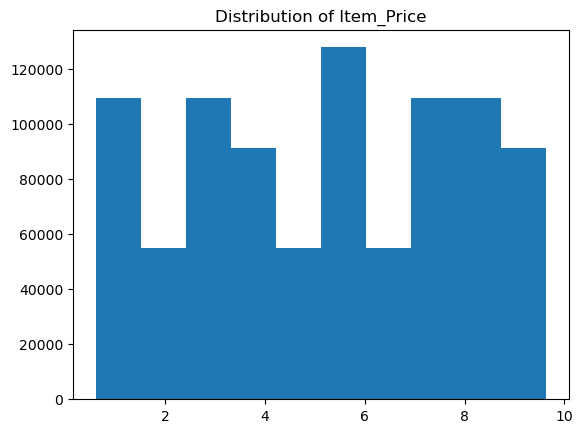

In [6]:
#visualize our distribution
plt.hist(df.item_price)
plt.title('Distribution of Item_Price')
plt.show()

### 3. Set the index to be the datetime variable.


In [7]:
# set index to datetimeindex
df = df.set_index('sale_date').sort_index()

### 4. Add a 'month' and 'day of week' column to your dataframe.


In [8]:
df['month'] = df.index.month_name()
df['day_of_week'] = df.index.day_of_week

### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.


In [9]:
df['sales_total'] = df.sale_amount * df.item_price

### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [10]:
df = get_store_data()
df = prep_store_data(df)

## opsd_germany_daily

In [11]:
# acquire data from acquire module
df = get_german_power()

In [12]:
# change column names to lowercase
df.columns = df.columns.str.lower()
df.rename(columns={'wind+solar': 'wind_and_solar'}, inplace=True)

### 1. Convert date column to datetime format.


In [13]:
# convert date column to datetime
df.date = pd.to_datetime(df.date)

### 2. Plot the distribution of each of your variables.

date


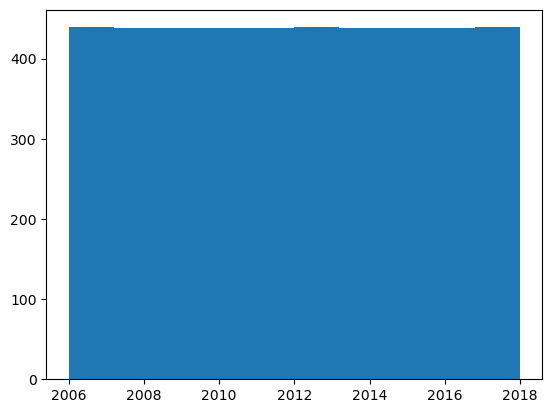

consumption


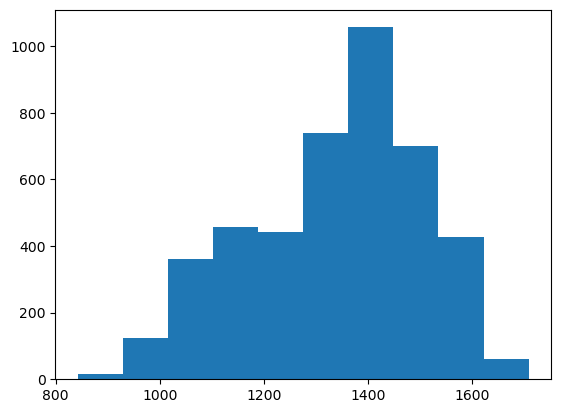

wind


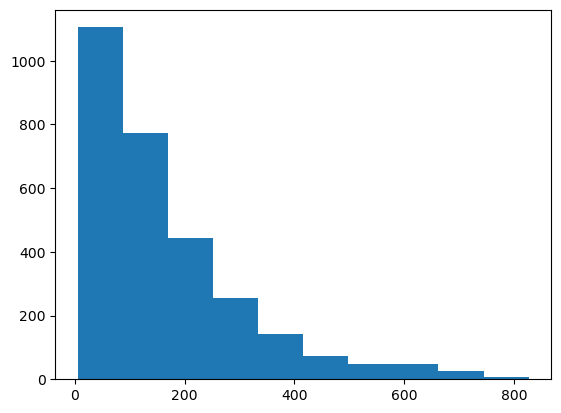

solar


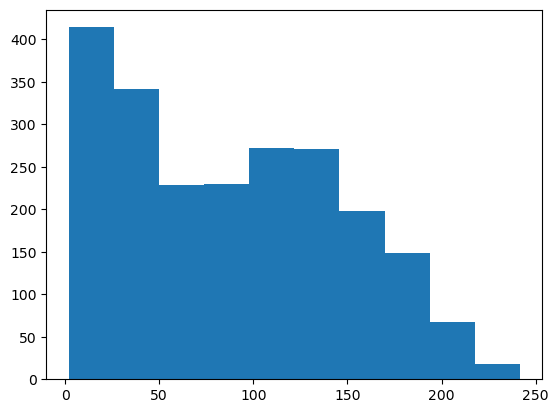

wind_and_solar


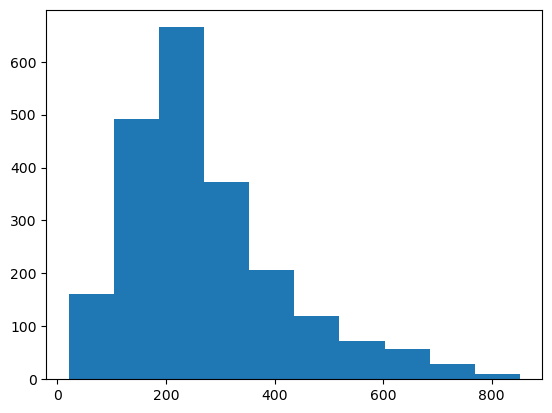

In [14]:
#visualize our distribution
for col in df.columns:
    print(col)
    plt.hist(df[col])
    plt.show()

### 3. Set the index to be the datetime variable.


In [15]:
# set index to datetimeindex
df = df.set_index('date').sort_index()

### 4. Add a month and a year column to your dataframe.


In [16]:
df['month'] = df.index.month_name()
df['year'] = df.index.year
df.head()

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


### 5. Fill any missing values.


In [17]:
df.isna().sum()

consumption          0
wind              1463
solar             2195
wind_and_solar    2196
month                0
year                 0
dtype: int64

In [18]:
# fill nulls for wind, solar, wind_and_solar with 0
df = df.fillna(0)

### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [5]:
df = get_german_power()
df = prep_german_power(df)